**Author**: Yutong Shen

## Assignment Objectives

For this assignment, you can use NLP to understand the dataset and the Twitter Conference Backchannel. You will need to create a cohesive narrative about your analysis. Be sure to include the statement of the purpose, the analysis (and replicatable codes), results, and a brief discussion about what you have found.

Below are some example analyses you can run:

* Sentiment Analysis: A sentiment analysis on tweets to explore the affective states behind the messages.

* Topic Modeling: What are they talking about? Is there any emerging topics overall or across different groups?

* Predicting Replies: What type of tweet is more likely to attract replies? Is there a “magical word”? Are you able to build a classifier that can predicting the possibility of getting replies with a given tweet?

* Classification: And maybe you can step one step further to see if you can classify the activities happening in this Twitter conference backchannel.

The purpose is to develop a cohesive narrative about what question your analysis can answer.

In [45]:
import pandas as pd
import numpy as np

In [46]:
data = pd.read_excel("Twitter_Conference_Backchannel.xlsx")
data

,document,tweeter,tweetTextOriginal,Followers,Follows,Replies exist? (Y or N),Activity
0,1,dr_menn,You know you’ve been immersed in @OLCToday’s #...,272.0,497.0,N,PS
1,2,mhhighered,?? ?? #ICYMI: @ASU & @UCF were awarded the Dig...,17432.0,5749.0,N,CI
2,3,edtechdev,Added the Peralta Equity Rubric to this list ...,3779.0,3716.0,N,NKA
3,4,kthompso,i appreciate the reflective gratitude and the ...,2440.0,1232.0,N,PN
4,5,angelagunder,Hey #OLCAccelerate #FOMOfest - I was so busy t...,684.0,698.0,Y,PS
...,...,...,...,...,...,...,...
1756,1523,Angela Gibson,Thank you @OLCToday #OLCAccelerate!,NaN,NaN,Y,PS
1757,1525,Angela Gibson,#BestInTrack thanks @OLCToday #OLCAccelerate !!!!,NaN,NaN,Y,PS
1758,1630,Holly Owens,We’re here! #OLCAccelerate @jlabeatnik,NaN,NaN,N,PS
1759,1671,Angela Gibson,Hello @OLCToday!!!! #OLCAccelerate,NaN,NaN,Y,PS


## Data Cleaning and Wrangling

In [47]:
# import the regex library
import re

In [48]:
import string
def clean_text(text):
    # Make text lowercase, remove punctuations, and remove numbers
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('[0-9]+','', text)
    return text

In [49]:
dataClean = data
dataClean['tweetTextOriginal'] = data['tweetTextOriginal'].map(clean_text)
dataClean

,document,tweeter,tweetTextOriginal,Followers,Follows,Replies exist? (Y or N),Activity
0,1,dr_menn,you know you’ve been immersed in olctoday’s ol...,272.0,497.0,N,PS
1,2,mhhighered,icymi asu ucf were awarded the digital inno...,17432.0,5749.0,N,CI
2,3,edtechdev,added the peralta equity rubric to this list ...,3779.0,3716.0,N,NKA
3,4,kthompso,i appreciate the reflective gratitude and the ...,2440.0,1232.0,N,PN
4,5,angelagunder,hey olcaccelerate fomofest i was so busy this...,684.0,698.0,Y,PS
...,...,...,...,...,...,...,...
1756,1523,Angela Gibson,thank you olctoday olcaccelerate,NaN,NaN,Y,PS
1757,1525,Angela Gibson,bestintrack thanks olctoday olcaccelerate,NaN,NaN,Y,PS
1758,1630,Holly Owens,we’re here olcaccelerate jlabeatnik,NaN,NaN,N,PS
1759,1671,Angela Gibson,hello olctoday olcaccelerate,NaN,NaN,Y,PS


In [50]:
data['Activity'].unique()

array(['PS', 'CI', 'NKA', 'PN', 'NKA ', 'PN '], dtype=object)

In [51]:
def remove_space(text):
    text = text.strip()
    return text
dataClean['Activity'] = data['Activity'].map(remove_space)
dataClean

,document,tweeter,tweetTextOriginal,Followers,Follows,Replies exist? (Y or N),Activity
0,1,dr_menn,you know you’ve been immersed in olctoday’s ol...,272.0,497.0,N,PS
1,2,mhhighered,icymi asu ucf were awarded the digital inno...,17432.0,5749.0,N,CI
2,3,edtechdev,added the peralta equity rubric to this list ...,3779.0,3716.0,N,NKA
3,4,kthompso,i appreciate the reflective gratitude and the ...,2440.0,1232.0,N,PN
4,5,angelagunder,hey olcaccelerate fomofest i was so busy this...,684.0,698.0,Y,PS
...,...,...,...,...,...,...,...
1756,1523,Angela Gibson,thank you olctoday olcaccelerate,NaN,NaN,Y,PS
1757,1525,Angela Gibson,bestintrack thanks olctoday olcaccelerate,NaN,NaN,Y,PS
1758,1630,Holly Owens,we’re here olcaccelerate jlabeatnik,NaN,NaN,N,PS
1759,1671,Angela Gibson,hello olctoday olcaccelerate,NaN,NaN,Y,PS


In [52]:
dataClean['Activity'].unique()

array(['PS', 'CI', 'NKA', 'PN'], dtype=object)

In [53]:
# check for missing values
dataClean.isnull().sum()

document                    0
tweeter                     0
tweetTextOriginal           0
Followers                  11
Follows                    11
Replies exist? (Y or N)    28
Activity                    0
dtype: int64

In [54]:
# drop missing values
dataClean = dataClean.dropna()
dataClean

,document,tweeter,tweetTextOriginal,Followers,Follows,Replies exist? (Y or N),Activity
0,1,dr_menn,you know you’ve been immersed in olctoday’s ol...,272.0,497.0,N,PS
1,2,mhhighered,icymi asu ucf were awarded the digital inno...,17432.0,5749.0,N,CI
2,3,edtechdev,added the peralta equity rubric to this list ...,3779.0,3716.0,N,NKA
3,4,kthompso,i appreciate the reflective gratitude and the ...,2440.0,1232.0,N,PN
4,5,angelagunder,hey olcaccelerate fomofest i was so busy this...,684.0,698.0,Y,PS
...,...,...,...,...,...,...,...
1745,1778,OLCToday,have you begun mapping out a plan for olcaccel...,16584.0,9329.0,Y,CI
1746,1779,proudfootedu,anyone at olctoday olcaccelerate have the tim...,244.0,631.0,N,PN
1747,1780,OLCToday,many of us will be attending mickey’s very mer...,16584.0,9329.0,N,PN
1748,1781,JillBuban,excellent read on the landscape of digital lea...,1085.0,945.0,N,NKA


## Organizing Data

Now, the data is almost ready to be analyzed. But before that, there are two important concepts for text formats we need to know:
* **Corpus**: a collection of text
* **Document-Term Matrix**: word counts in matrix format

What we already have is a corpus. It is human-readable because it stores the data in a natural language style. However, For many of the techniques we'll be using, algorithms do not recognize our natural language. Particularly, the statistics tools we have been using/learning relies on processing quantifiable numbers.

As a result, we need to tokenize the text/corpus, meaning broken the text down into smaller pieces. The most common tokenization technique is to break down text into words. Essentially, we are taking a dictionary of words and mark the occurence frequency and/or the order of each word for each text in the corpus. Then we can represent a corpus in the quantitative (but not quite human-readable) way. And it is called Document-Term Matrix, where every row will represent a different document and every column will represent a different word.

You can imagine that once the documents get longer and complicated, we may be dealing with a very wide and sparse matrix, which is not ideal for any statistics modeling. Therefore, we have two more important concepts to help simplify the process

* **Bag-of-words**: We treat each document as a big bag of words. We don't necessarily care the orders of the words (i.e., grammar) at this stage. Just knowing the semantic meaning of each words can already tell us a lot. In fact, aoccdrnig to a rscheearch at Cmabrigde Uinervtisy, it deosn't mttaer in waht oredr the ltteers in a wrod are.
* **Stop words**: They are a set of commonly used words in a language. Examples of stop words in English are “a”, “the”, “is”, “are” and etc. Stop words are so commonly used that they carry very little useful information. So getting rid of them might be a good idea.

Although the task can sound complicated, We can automate this using scikit-learn's CountVectorizer() to build a document-term matrix in a BOW style without the common stop words fairly easily.

In cv= CountVectorizer(), CountVectorizer() randomly assigns a number to each word in a process called tokenizing. Then, it counts the number of occurrences of words and saves it to cv. At this point, we’ve only assigned a method to cv.

In [55]:
# We are going to create a document-term matrix using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')

commentCV = cv.fit_transform(dataClean['tweetTextOriginal'])
commentCV_dtm = pd.DataFrame(commentCV.toarray(), columns = cv.get_feature_names_out())

commentCV_dtm.index = dataClean['tweetTextOriginal'].index
commentCV_dtm

,aa,able,absence,absolute,absolutely,absorbing,abt,abundance,abusing,academia,...,yuengling,zen,zero,zhadko,zing,zone,zoom,zoomus,zydney,zydneys
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Exploratory Analysis

In [56]:
# check the distribution of the tweet activities and replies
dataClean[['document', 'Replies exist? (Y or N)', 'Activity']].groupby(['Replies exist? (Y or N)', 
                                                                        'Activity']).count().unstack()

document              
Activity                      CI  NKA  PN   PS
Replies exist? (Y or N)                       
N                            414  523  99  320
Y                             73  119  73  101

Overall, the distribution is skewed across the four activities -- there are more tweets that have no replies. Among the four activities, NKA tweets have the most replies of 119, while CI and PN tweets have the least replies of 73.

Using the document-term matrix, we can calculate the term frequency to get the most frequently used words in all tweets. Below, we can find out the top 30 words.

In [57]:
totalCT = commentCV_dtm.sum()
commentCV_dtm[totalCT.sort_values(ascending = False).index[:30]].sum()

olcaccelerate    1808
learning          247
online            205
olctoday          176
fomofest          175
session           135
rt                126
great             122
join              120
booth             118
students          115
conference        113
today             111
keynote            83
just               81
olc                80
avantgame          78
like               75
time               74
learn              74
day                71
come               69
faculty            68
new                65
digital            62
love               61
orlando            60
need               60
work               59
thanks             59
dtype: int64

Overall, the most frequently used 30 words review positive sentiment of the tweets.

## Topic Modeling

One popular text analysis technique is called topic modeling. The ultimate goal of topic modeling is to find various topics that are present in your corpus. Each document in the corpus will be made up of at least one topic, if not multiple topics. Particularly, I will use one of the most frequently used TM methods, Latent Dirichlet Allocation (LDA).

To use a topic modeling technique, we need to provide (1) a document-term matrix and (2) the number of topics we would like the algorithm to pick up.

In [58]:
from gensim import matutils, models
import scipy.sparse

Then we need to transpose the document term matrix to term-document matrix and use sparse.csr_matrix() to compress a matrix that is in rows and prepare the data in genism format and obtain a dictionary id2word of the locations of each term in the tdm.

In [59]:
# transpose the document term matrix to term-document matrix 
tdm = commentCV_dtm.transpose()

# use sparse.csr_matrix() to compress a matrix that is in rows 
sparse_counts = scipy.sparse.csr_matrix(tdm)

# prepare the data in genism format 
corpus = matutils.Sparse2Corpus(sparse_counts)

# obtain a dictionary id2word of the locations of each term in the tdm.
id2word = dict((v, p) for p, v in cv.vocabulary_.items())

Then pass everything to we need to LdaModel() and specify a few other parameters (e.g., the number of topics and the number of passes).

passes is the number of laps the model will take through corpus. The greater the number of passes, the more accurate the model will be. A lot of passes can be slow on a very large corpus.

In [60]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=30)
lda.print_topics()

[(0,
  '0.058*"olcaccelerate" + 0.013*"olctoday" + 0.011*"booth" + 0.008*"session" + 0.006*"online" + 0.006*"fomofest" + 0.006*"learning" + 0.006*"come" + 0.005*"hall" + 0.005*"rt"'),
 (1,
  '0.074*"olcaccelerate" + 0.012*"learning" + 0.010*"online" + 0.007*"keynote" + 0.006*"students" + 0.006*"fomofest" + 0.006*"avantgame" + 0.006*"olc" + 0.005*"olctoday" + 0.005*"learn"'),
 (2,
  '0.070*"olcaccelerate" + 0.010*"join" + 0.010*"learning" + 0.007*"fomofest" + 0.007*"conference" + 0.007*"rt" + 0.006*"online" + 0.006*"olclive" + 0.006*"today" + 0.005*"great"')]

The topic modeling makes sense to me. The Online Learning Consortium Conference tweets is centered with the words including olcaccekerate (its official hashtag #OLCAccelerate), online, learning, students, session, etc. The words are all related to the online learning contexts, and it makes sense that they appear more frequently than others. Also, the words great and good can indicate that there was positive feedback for the conference.

## **Topic Modeling (Removing 'olcaccelerate', 'olctoday', & 'olc')**

Trying to remove the words "olcaccelerate", "olctoday", and "olc to check the influence on the topic modeling result.

In [61]:
commentCV_dtmD = commentCV_dtm.drop(columns=['olcaccelerate', 'olctoday', 'olc'])
commentCV_dtmD

,aa,able,absence,absolute,absolutely,absorbing,abt,abundance,abusing,academia,...,yuengling,zen,zero,zhadko,zing,zone,zoom,zoomus,zydney,zydneys
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Then, follow the same procedure to see how does the removal of 'olcaccelerate', 'olctoday', 'olc' affect the overall distribution.

In [62]:
# transpose the document term matrix to term-document matrix 
tdm2 = commentCV_dtmD.transpose()

# use sparse.csr_matrix() to compress a matrix that is in rows 
sparse_counts2 = scipy.sparse.csr_matrix(tdm2)

# prepare the data in genism format 
corpus2 = matutils.Sparse2Corpus(sparse_counts2)

# obtain a dictionary id2word of the locations of each term in the tdm.
id2word = dict((v, p) for p, v in cv.vocabulary_.items())

In [63]:
lda2 = models.LdaModel(corpus=corpus2, id2word=id2word, num_topics=3, passes=30)
lda2.print_topics()

[(0,
  '0.020*"learning" + 0.010*"ones" + 0.009*"fomofest" + 0.008*"serve" + 0.007*"great" + 0.006*"join" + 0.005*"looking" + 0.005*"studentengagement" + 0.005*"digital" + 0.004*"wednesday"'),
 (1,
  '0.009*"ones" + 0.008*"studentengagement" + 0.007*"route" + 0.007*"booth" + 0.006*"fomofest" + 0.006*"keynote" + 0.006*"serve" + 0.006*"learning" + 0.005*"tjoosten" + 0.005*"just"'),
 (2,
  '0.009*"conference" + 0.006*"ones" + 0.006*"join" + 0.006*"great" + 0.005*"thad" + 0.005*"new" + 0.005*"booth" + 0.005*"fomofest" + 0.005*"angelagunder" + 0.004*"route"')]

After removing the words 'olcaccelerate', 'olctoday', 'olc', we can see that words like 'learning', 'serve', 'studentengagement' is taking up a greater proportion. The topic modeling again reveals positive feedback for the conference.

# Classification: Predicting Replies

In [137]:
# create a shallow copy of dataClean
dataN = dataClean.copy()

# map the variable 'Replies exist? (Y or N)' so that it is represented as 0 & 1
n = {'Y': 1, 'N': 0}
dataN['Replies'] = dataClean['Replies exist? (Y or N)'].map(n)
dataN = dataN.drop(['Replies exist? (Y or N)'], axis=1)
dataN.head()

,document,tweeter,tweetTextOriginal,Followers,Follows,Activity,Replies
0,1,dr_menn,you know you’ve been immersed in olctoday’s ol...,272.0,497.0,PS,0
1,2,mhhighered,icymi asu ucf were awarded the digital inno...,17432.0,5749.0,CI,0
2,3,edtechdev,added the peralta equity rubric to this list ...,3779.0,3716.0,NKA,0
3,4,kthompso,i appreciate the reflective gratitude and the ...,2440.0,1232.0,PN,0
4,5,angelagunder,hey olcaccelerate fomofest i was so busy this...,684.0,698.0,PS,1


## **K-Fold**

In [66]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

X = dataN['tweetTextOriginal']
y = dataN['Replies']
cv = CountVectorizer(stop_words='english')
features = cv.fit_transform(X).toarray()
kf = KFold(n_splits=10, random_state=1, shuffle=True)
model = MultinomialNB()
scores = cross_val_score(model, features, y, scoring='accuracy', cv=kf, n_jobs=-1)
print(scores)

[0.67052023 0.71676301 0.74418605 0.79651163 0.70930233 0.74418605
 0.75581395 0.75581395 0.74418605 0.76162791]


The mean score and the standard deviation for **Multinomial NB** are given by:

In [67]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.74 accuracy with a standard deviation of 0.03


In [68]:
from sklearn import svm

model2 = svm.SVC()
scores2 = cross_val_score(model2, features, y, scoring='accuracy', cv=kf, n_jobs=-1)
print(scores2)

[0.76878613 0.76300578 0.76744186 0.83139535 0.79651163 0.81395349
 0.75581395 0.80232558 0.77906977 0.77906977]


The mean score and the standard deviation for **SVM** are given by:

In [69]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores2.mean(), scores2.std()))

0.79 accuracy with a standard deviation of 0.02


Therefore, **SVM** has a higher mean accuracy score of **79%** than **Multinomial NB** of **74%** with K-Fold.

## **Train_Test_Split**

In [138]:
# split the dataset into two:
from sklearn.model_selection import train_test_split

X = dataN['tweetTextOriginal']
Y = dataN['Replies']
x_training, x_test, y_training, y_test = train_test_split(X, Y, test_size = 0.25)

Then call the classifier models and feed in the training data and labels. First using the classic **Naive Bayes algorithm**. I used the multinomial Naive Bayes classifier as it is suitable for classification with discrete features (e.g., word counts for text classification).

In [139]:
from sklearn.naive_bayes import MultinomialNB

# Prepare the training features
cv = CountVectorizer(stop_words='english')
features = cv.fit_transform(x_training).toarray()

# Train a Naive Bayes Model
model = MultinomialNB()
model.fit(features, y_training)

# Prepare the testing xs
# using transform and fit_transform to standardize the data
feature_test = cv.transform(x_test).toarray()

# Print the model accuracy
print(model.score(feature_test,y_test))

0.7911832946635731


**Confusion Matrix**

In [140]:
from sklearn.metrics import confusion_matrix

# Compare the predicted Ys with what is actually in the testing dataset and obtain the confusion matrix
y_pred = model.predict(feature_test)
print(confusion_matrix(y_test,y_pred))

[[330  12]
 [ 78  11]]


79.1% accuracy is not bad. From the confusion matrix, we can see that more sample is predicted to be 0 (non-NKA) given the unbalanced dataset. To compare the result, take a look at **supported vector machine**.

In [141]:
from sklearn import svm

# Prepare the training features
cv = CountVectorizer(stop_words='english')
features = cv.fit_transform(x_training)

# Train SVM classifier
model = svm.SVC(probability=True)
model.fit(features, y_training)

# Prepare the testing xs
feature_test = cv.transform(x_test)

# Print the model accuracy
print(model.score(feature_test,y_test))

0.7935034802784223


**Confusion Matrix**

In [142]:
y_pred = model.predict(feature_test)
print(confusion_matrix(y_test, y_pred))

[[342   0]
 [ 89   0]]


SVM has a slightly better accuracy of 79.4% than the multinomial naive bayes model in predicting replies. However, from the confusion matrix, we can see that the model predicts all sample to be 0 (non-NKA).

### **ROC Curve**

In [143]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ROC Curve Plot for the **Multinomial Naive Bayes Classifier** and the **SVM Model**:

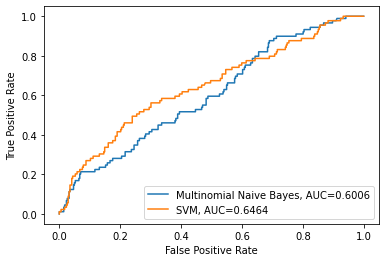

In [144]:
import matplotlib.pyplot as plt
from sklearn import metrics

#set up plotting area
plt.figure(0).clf()

#fit Multinomial NB model and plot ROC curve
model = MultinomialNB()
model.fit(features, y_training)
y_pred = model.predict_proba(feature_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Multinomial Naive Bayes, AUC="+str(auc))

#fit SVM model and plot ROC curve
model = svm.SVC(probability=True)
model.fit(features, y_training)
y_pred = model.predict_proba(feature_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="SVM, AUC="+str(auc))

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

#add legend
plt.legend()
plt.show()

We can see from the plot and AUC that the SVM performs slightly better than the Multinomial NB.

# Classification: Classify the Activities (NKA/non-NKA)

In [79]:
# create a shallow copy of dataClean
dataNKA = dataClean.copy()

# map the variable 'Activity' so that 'ActivityNKA' represents NKA and non-NKA
a = {'PS': 0, 'PN': 0, 'CI': 0, 'NKA': 1}
dataNKA['ActivityNKA'] = dataNKA['Activity'].map(a)
dataNKA = dataNKA.drop(['Activity'], axis=1)
dataNKA.head()

,document,tweeter,tweetTextOriginal,Followers,Follows,Replies exist? (Y or N),ActivityNKA
0,1,dr_menn,you know you’ve been immersed in olctoday’s ol...,272.0,497.0,N,0
1,2,mhhighered,icymi asu ucf were awarded the digital inno...,17432.0,5749.0,N,0
2,3,edtechdev,added the peralta equity rubric to this list ...,3779.0,3716.0,N,1
3,4,kthompso,i appreciate the reflective gratitude and the ...,2440.0,1232.0,N,0
4,5,angelagunder,hey olcaccelerate fomofest i was so busy this...,684.0,698.0,Y,0


### **K-Fold**

In [80]:
X = dataNKA['tweetTextOriginal']
y = dataNKA['ActivityNKA']
cv = CountVectorizer(stop_words='english')
features = cv.fit_transform(X).toarray()
kf = KFold(n_splits=10, random_state=1, shuffle=True)
model = MultinomialNB()
scores = cross_val_score(model, features, y, scoring='accuracy', cv=kf, n_jobs=-1)
print(scores)

[0.86127168 0.83236994 0.86046512 0.84883721 0.81395349 0.80813953
 0.84883721 0.88953488 0.86627907 0.87790698]


The mean score and the standard deviation for Multinomial NB are given by:

In [81]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.85 accuracy with a standard deviation of 0.02


In [82]:
model2 = svm.SVC()
scores2 = cross_val_score(model2, features, y, scoring='accuracy', cv=kf, n_jobs=-1)
print(scores2)

[0.8265896  0.8150289  0.80813953 0.83139535 0.79069767 0.80232558
 0.84302326 0.81976744 0.86627907 0.79069767]


The mean score and the standard deviation for SVM are given by:

In [83]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores2.mean(), scores2.std()))

0.82 accuracy with a standard deviation of 0.02


Therefore, **Multinomial NB** has a higher mean accuracy score of **85%** than **SVM** of **82%** with K-Fold.

### **Train_Test_Split**

In [84]:
# split the dataset into two:
from sklearn.model_selection import train_test_split

Xs = dataNKA['tweetTextOriginal']
Ys = dataNKA['ActivityNKA']
X_train, X_test, Y_train, Y_test = train_test_split(Xs, Ys, test_size = 0.25)

Use **multinomial naive bayes** algorithm.

In [85]:
from sklearn.naive_bayes import MultinomialNB

# Prepare the training features
cv = CountVectorizer(stop_words='english')
features = cv.fit_transform(X_train).toarray()

# Train a Naive Bayes Model
model = MultinomialNB()
model.fit(features, Y_train)

# Prepare the testing xs
# using transform and fit_transform to standardize the data
feature_test = cv.transform(X_test).toarray()

# Print the model accuracy
print(model.score(feature_test,Y_test))

0.839907192575406


**Confusion Matrix**

In [86]:
Y_pred = model.predict(feature_test)
print(confusion_matrix(Y_test, Y_pred))

[[230  21]
 [ 48 132]]


**Multinomial NB** has an accuracy of **84.0%**, which is good. Similarly, I will compare it with **support vector machine**.

In [87]:
from sklearn import svm

# Prepare the training features
cv = CountVectorizer(stop_words='english')
features = cv.fit_transform(X_train)

# Train SVM classifier & balance the dataset
model = svm.SVC(class_weight='balanced')
model.fit(features, Y_train)

# Prepare the testing xs
feature_test = cv.transform(X_test)

# Print the model accuracy
print(model.score(feature_test,Y_test))

0.7865429234338747


**Confusion Matrix**

In [88]:
Y_pred = model.predict(feature_test)
print(confusion_matrix(Y_test, Y_pred))

[[237  14]
 [ 78 102]]


**SVM** has a lower accuracy of **78.7%** than the multinomial naive bayes model.

Comparing the confusion matrixs, Multinomial NB performs better since it has more true positive and true negative.

### **ROC Curve**

ROC Curve Plot for the **Multinomial Naive Bayes Classifier** and the **SVM Model**:

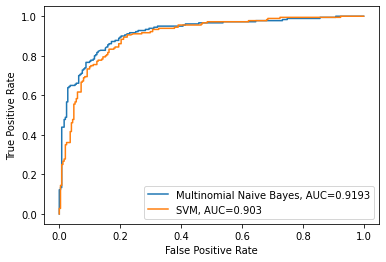

In [89]:
#set up plotting area
plt.figure(0).clf()

#fit Multinomial NB model and plot ROC curve
model = MultinomialNB()
model.fit(features, Y_train)
Y_pred = model.predict_proba(feature_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(Y_test, Y_pred)
auc = round(metrics.roc_auc_score(Y_test, Y_pred), 4)
plt.plot(fpr,tpr,label="Multinomial Naive Bayes, AUC="+str(auc))

#fit SVM model and plot ROC curve
model = svm.SVC(probability=True)
model.fit(features, Y_train)
Y_pred = model.predict_proba(feature_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(Y_test, Y_pred)
auc = round(metrics.roc_auc_score(Y_test, Y_pred), 4)
plt.plot(fpr,tpr,label="SVM, AUC="+str(auc))

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

#add legend
plt.legend()
plt.show()

We can see from the plot and AUC that the Multinomial NB performs slightly better than the SVM.

# Classification: Classify the Activities (NKA/non-NKA) - Balance the Dataset

In [95]:
# split the dataset into two:
from sklearn.model_selection import train_test_split

Xs = dataNKA['tweetTextOriginal']
Ys = dataNKA['ActivityNKA']
X_train, X_test, Y_train, Y_test = train_test_split(Xs, Ys, test_size = 0.25)

### Multinomial Naive Bayes

In [126]:
from sklearn.utils import class_weight

y = Y_train
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)

# Convert class_weights to a dictionary to pass it to class_weight in model.fit
class_weights = dict(enumerate(class_weights))

In [129]:
# map 'Y_train'
Y_trainM = Y_train.map(class_weights)
Y_trainM

1566    0.786236
1695    0.786236
1208    0.786236
118     0.786236
1692    1.373404
          ...   
1001    1.373404
234     0.786236
1680    0.786236
1254    0.786236
1268    0.786236
Name: ActivityNKA, Length: 1291, dtype: float64

In [131]:
from sklearn.naive_bayes import MultinomialNB

# Prepare the training features
cv = CountVectorizer(stop_words='english')
features = cv.fit_transform(X_train).toarray()

# Train a Naive Bayes Model
model = MultinomialNB()
model.fit(features, Y_train, sample_weight=Y_trainM)

# Prepare the testing xs
# using transform and fit_transform to standardize the data
feature_test = cv.transform(X_test).toarray()

# Print the model accuracy
print(model.score(feature_test,Y_test))

0.8747099767981439


The accuracy for Multinomial Naive Bayes is 87.5% after adjusting weights.

**Confusion Matrix**

In [132]:
Y_pred = model.predict(feature_test)
print(confusion_matrix(Y_test, Y_pred))

[[225  34]
 [ 20 152]]


### Support Vector Machine

In [133]:
from sklearn import svm

# Prepare the training features
cv = CountVectorizer(stop_words='english')
features = cv.fit_transform(X_train)

# Train SVM classifier
model = svm.SVC(class_weight='balanced')
model.fit(features, Y_train)

# Prepare the testing xs
feature_test = cv.transform(X_test)

# Print the model accuracy
print(model.score(feature_test,Y_test))

0.839907192575406


The accuracy for SVM is 84.0% after adjusting weights.

**Confusion Matrix**

In [134]:
Y_pred = model.predict(feature_test)
print(confusion_matrix(Y_test, Y_pred))

[[222  37]
 [ 32 140]]


### **ROC Curve**

ROC Curve Plot for the **Multinomial Naive Bayes Classifier** and the **SVM Model**:

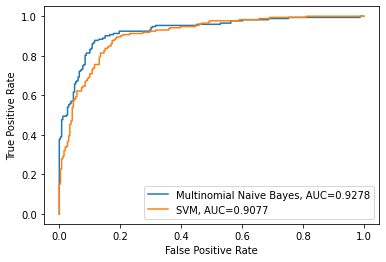

In [135]:
#set up plotting area
plt.figure(0).clf()

#fit Multinomial NB model and plot ROC curve
model = MultinomialNB()
model.fit(features, Y_train, sample_weight=Y_trainM)
Y_pred = model.predict_proba(feature_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(Y_test, Y_pred)
auc = round(metrics.roc_auc_score(Y_test, Y_pred), 4)
plt.plot(fpr,tpr,label="Multinomial Naive Bayes, AUC="+str(auc))

#fit SVM model and plot ROC curve
model = svm.SVC(class_weight='balanced', probability=True)
model.fit(features, Y_train)
Y_pred = model.predict_proba(feature_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(Y_test, Y_pred)
auc = round(metrics.roc_auc_score(Y_test, Y_pred), 4)
plt.plot(fpr,tpr,label="SVM, AUC="+str(auc))

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

#add legend
plt.legend()
plt.show()

We can see that the accuracy for the models increased after balancing the dataset. The models now have more true positive and true negative. Also, Multinomial NB has a slightly higher accuracy than SVM.

## Discussion

Based on the above analysis, the 2018 Online Learning Consortium conference received mostly **positive feedback**. According to the exploratory analysis and topic modeling results, positive words such as great, good, like, love, thanks, etc. were frequently used in the tweeter text. Therefore, the overall sentiment of the tweets should be positive.

In addition, we can see from the explanatory analysis that among the four activities, **NKA** tweets have the most replies of 119, while **CI** and **PN** tweets have the least replies of 73.

The topic modeling makes sense to me. The Online Learning Consortium Conference tweets are centered with the words including olcaccekerate (its official hashtag #OLCAccelerate), online, learning, students, session, etc. The words are all related to the online learning contexts, and it makes sense that they appear more frequently than others. Also, the words great and good can indicate that there was positive feedback for the conference.

As for the classification:

* I tried to build classifiers to **predict replies** from the original tweet retrieved in the text format. The **support vector machine model** has a slightly higher accuracy of **79.4%** than the multinomial naive bayes model in predicting the possibility of getting replies with a given tweet.
* Next, I tried to **classify the activities (NKA/non-NKA)** from the original tweet retrieved in the text format. 
  * When not balancing the dataset, the **multinomial naive bayes model** performed better with an accuracy of **84.0%** than the support vector machine with an accuracy of 78.7%.
  * After balancing the dataset, **Multinomial NB** has an accuracy of **87.5%** and **SVM** has an accuracy of **84.0%**. The models have higher accuracy after adjusting the weights.

